## 서울시 구별 CCTV / 인구 분석

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
df = pd.read_csv('../02.Pandas/cctv_pop.csv', index_col='구별')
df.head(3)

,인구수,내국인,외국인,고령자,외국인비율,고령자비율,CCTV댓수,최근 증가율
구별,,,,,,,,
종로구,153789,144683,9106,27818,5.921100,18.088420,1715,20.689655
중구,131787,122499,9288,24392,7.047736,18.508654,2447,78.984238
용산구,237285,222953,14332,39070,6.039994,16.465432,2611,78.635682


- 상관관계 분석
    - CCTV 댓수 vs 인구수, 외국인비율, 고령자비율

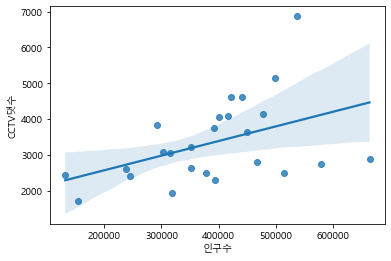

In [4]:
# CCTV 댓수 vs 인구수
sns.regplot(x='인구수', y='CCTV댓수', data=df)
plt.show()

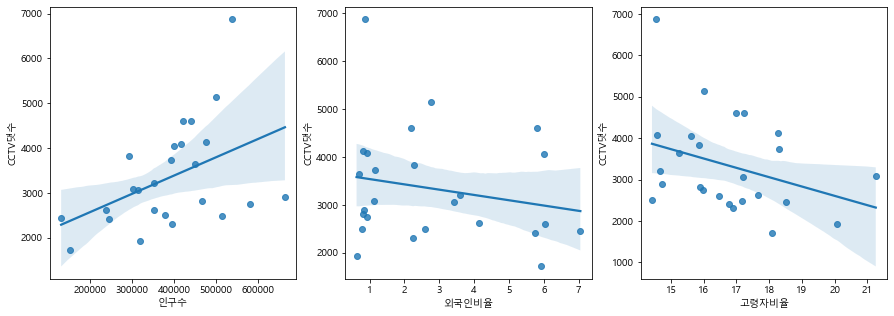

In [5]:
_, axs = plt.subplots(1, 3, figsize=(15,5))
features = ['인구수', '외국인비율', '고령자비율']
for i, feature in enumerate(features):
    sns.regplot(x=feature, y='CCTV댓수', data=df, ax=axs[i])

- 구별 CCTV 댓수 시각화

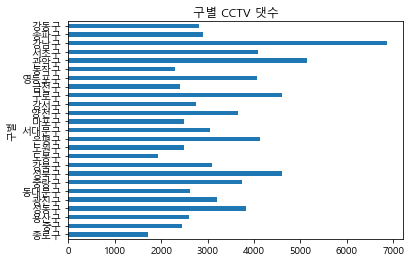

In [6]:
df.CCTV댓수.plot(kind='barh')
plt.title('구별 CCTV 댓수')
plt.show()

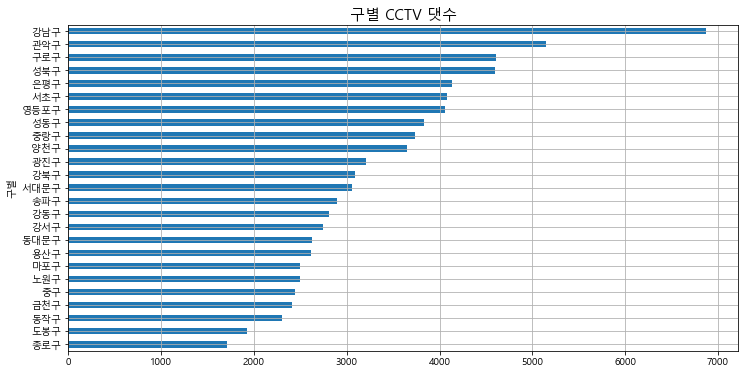

In [8]:
df.CCTV댓수.sort_values().plot(kind='barh', grid=True, figsize =(12,6))
plt.title('구별 CCTV 댓수', fontsize=15)
plt.show()

- 인구 대비 CCTV 비율 시각화

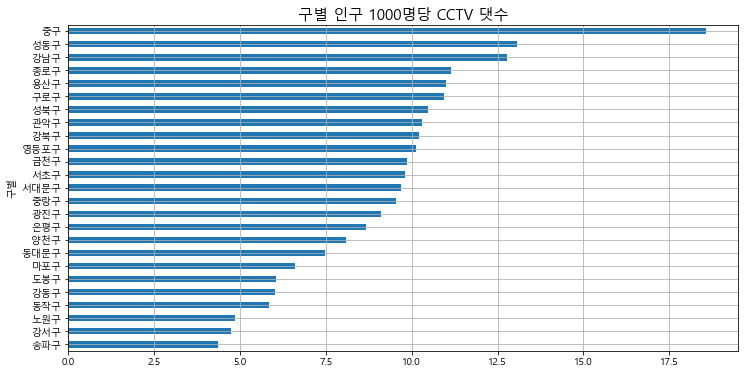

In [10]:
# 인구 1000명당 CCTV 댓수
df['CCTV비율'] = (df.CCTV댓수 / (df.인구수/1000)).round(2)
df.CCTV비율.sort_values().plot(kind='barh', grid=True, figsize =(12,6))
plt.title('구별 인구 1000명당 CCTV 댓수', fontsize=15)
plt.show()

#### 인구수와 CCTV 댓수 분석

- 산점도(Scatter plot)

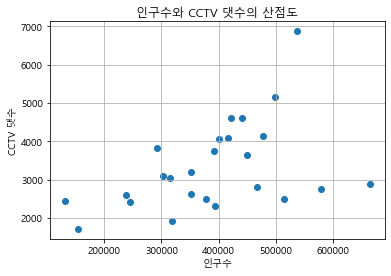

In [11]:
plt.scatter(x=df.인구수, y=df.CCTV댓수)
plt.title('인구수와 CCTV 댓수의 산점도')
plt.xlabel('인구수'), plt.ylabel('CCTV 댓수')
plt.grid(); plt.show()

- 회귀선

In [12]:
weight, bias = np.polyfit(df.인구수, df.CCTV댓수, 1)
weight, bias

(0.004085429243410676, 1751.2460231825626)

In [14]:
x = np.array([100000, 700000])
y = weight * x + bias
y

array([2159.78894752, 4611.04649357])

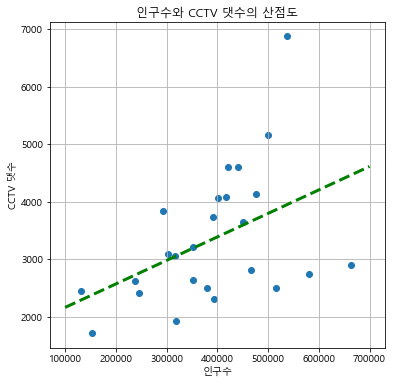

In [15]:
plt.figure(figsize=(6,6))
plt.scatter(x=df.인구수, y=df.CCTV댓수)
plt.plot(x, y, 'g--', lw=3)
plt.title('인구수와 CCTV 댓수의 산점도')
plt.xlabel('인구수'), plt.ylabel('CCTV 댓수')
plt.grid(); plt.show()

- 회귀선과 산점도 사이의 절대오차

In [20]:
df['오차'] = abs(df.CCTV댓수 - (df.인구수*weight + bias)).round(2)
df_sort = df.sort_values(by='오차', ascending=False)
df_sort.head(10)

,인구수,내국인,외국인,고령자,외국인비율,고령자비율,CCTV댓수,최근 증가율,CCTV비율,오차
구별,,,,,,,,,,
강남구,537800,533042,4758,78226,0.884716,14.545556,6871,63.241716,12.78,2922.61
송파구,663965,658338,5627,97691,0.847484,14.713276,2897,204.309392,4.36,1566.83
강서구,579768,574315,5453,92558,0.940549,15.964662,2744,79.114391,4.73,1375.85
노원구,514946,510956,3990,88345,0.774839,17.156168,2492,68.471810,4.84,1363.02
관악구,499449,485699,13750,79871,2.753034,15.991823,5149,48.294597,10.31,1357.29
구로구,421163,396754,24409,72611,5.795618,17.240593,4608,48.831264,10.94,1136.12
도봉구,319373,317366,2007,64160,0.628419,20.089363,1930,85.436893,6.04,1126.02
동작구,394364,385483,8881,66613,2.251980,16.891248,2306,83.614458,5.85,1056.39
성북구,440142,430528,9614,74709,2.184295,16.973840,4602,77.580372,10.46,1052.58


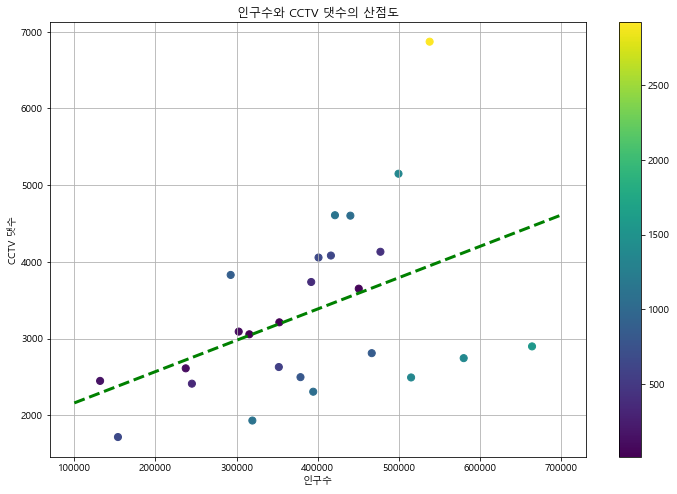

In [23]:
plt.figure(figsize=(12,8))
plt.scatter(x=df.인구수, y=df.CCTV댓수, c=df.오차, s=50)
plt.plot(x, y, 'g--', lw=3)
plt.title('인구수와 CCTV 댓수의 산점도')
plt.xlabel('인구수'), plt.ylabel('CCTV 댓수')
plt.colorbar()
plt.grid(); plt.show()

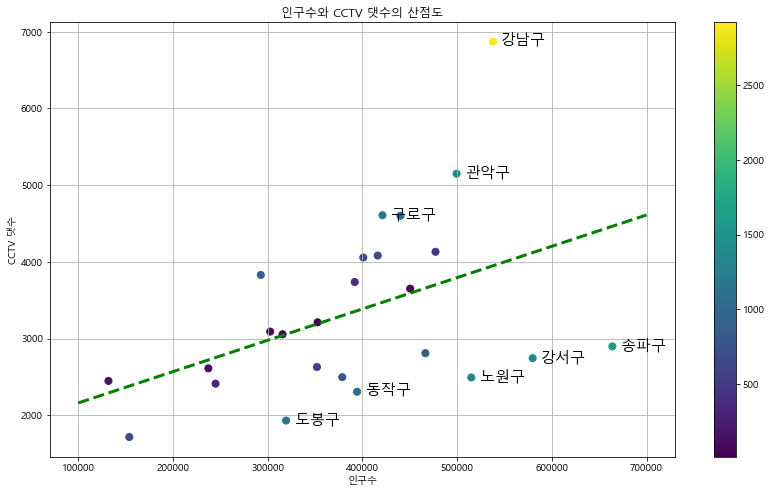

In [27]:
plt.figure(figsize=(14,8))
plt.scatter(x=df.인구수, y=df.CCTV댓수, c=df.오차, s=50)
plt.plot(x, y, 'g--', lw=3)
for i in range(8):
    plt.text(df_sort.인구수[i]+9000, df_sort.CCTV댓수[i]-50, 
             df.sort.index[i], fontsize=15)
plt.title('인구수와 CCTV 댓수의 산점도')
plt.xlabel('인구수'), plt.ylabel('CCTV 댓수')
plt.colorbar()
plt.grid(); plt.show()